## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts()
num_mice = len(mice)
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data["Mouse ID"].value_counts()
clean_num_mice = len(clean_mice)
clean_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = clean_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

regimen_median = clean_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

regimen_variance = clean_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

regimen_stdev = clean_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

regimen_sem = clean_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_stdev, "SEM": regimen_sem})

summary_stats_table.to_csv("file_one.csv", index=False, header=True)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_groupby = clean_data.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table_2 = single_groupby.aggregate(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

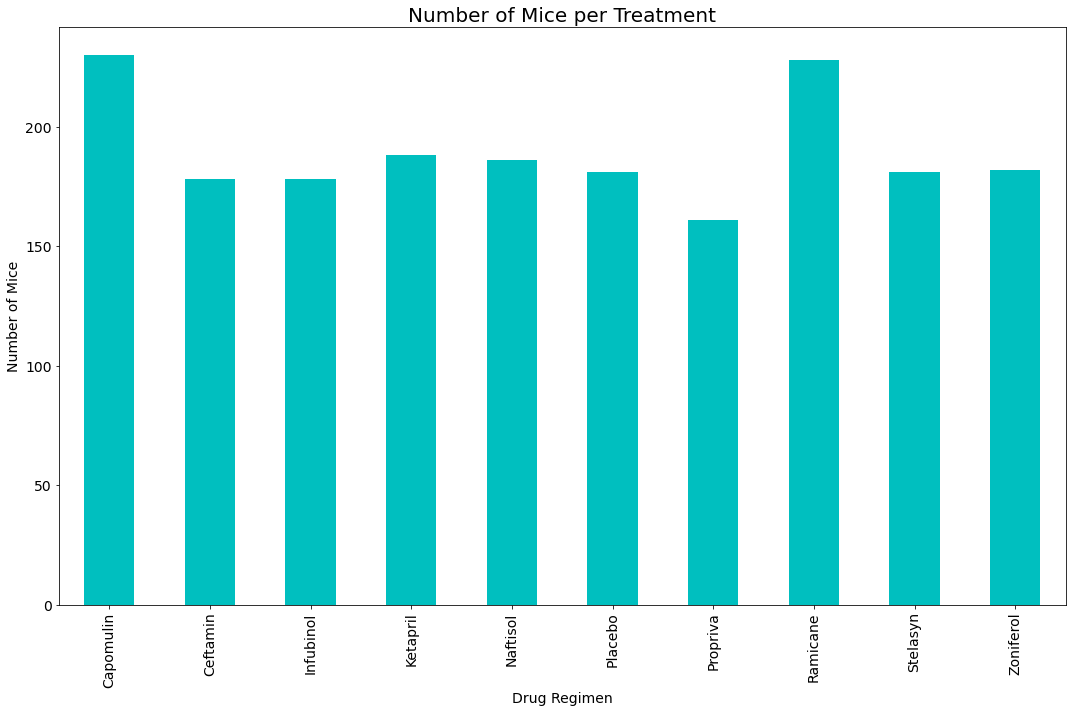

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_treat = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = mice_per_treat.plot.bar(figsize=(15,10), color='c', fontsize=14)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)
plt.title("Number of Mice per Treatment", fontsize=20)

plt.tight_layout()
plt.show()

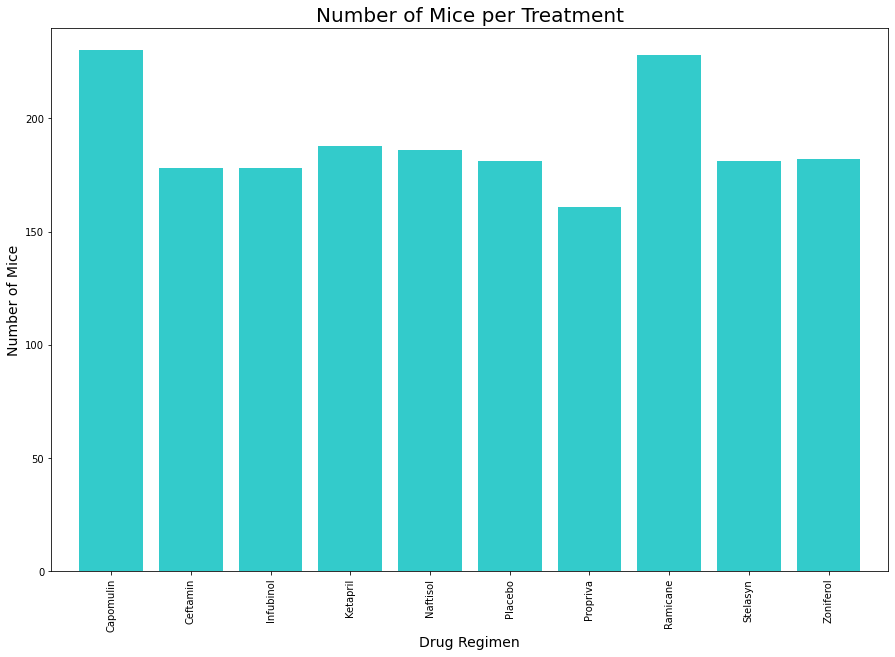

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_list = (combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mice_per_treat))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='c', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment", fontsize = 20)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)

plt.show()

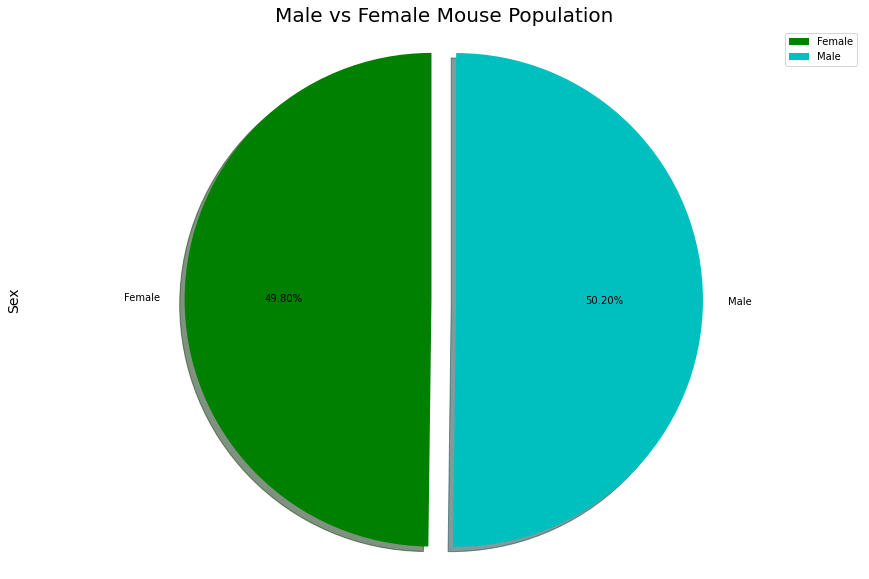

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# group by gender
groupby_gender = combined_data.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(groupby_gender.size())

# total count dataframe
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# calculate percentage of male/female mice
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

colors = ['g', 'c']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', figsize=(15,10), colors=colors, startangle=90, explode=explode, shadow=True, autopct="%.2f%%")

plt.title('Male vs Female Mouse Population', fontsize = 20)
plt.ylabel('Sex', fontsize = 14)
plt.axis('equal')

plt.show()

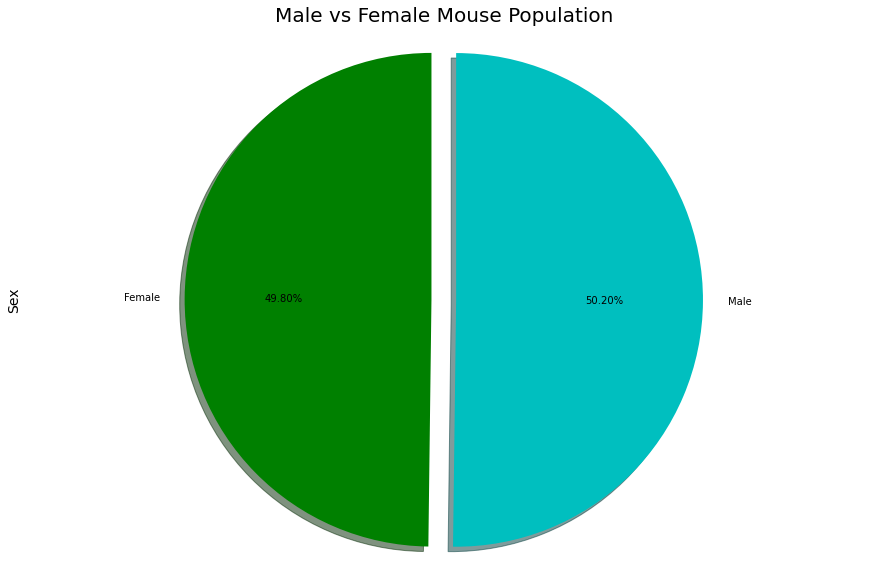

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# labels for the sections of the pie chart
labels = ["Female", "Male"]

# values of each section of the pie chart
sizes = [49.799197, 50.200803]

# styling pie chart
colors = ['g', 'c']
explode = (0.1, 0)
 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%.2f%%", shadow=True, startangle=90,)
plt.title('Male vs Female Mouse Population', fontsize=20)
plt.ylabel('Sex', fontsize=14)
plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, combined_data, on=("Mouse ID", "Timepoint"), how="left")

ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, combined_data, on=("Mouse ID","Timepoint"), how="left")

infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, combined_data, on=("Mouse ID","Timepoint"), how="left")

ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, combined_data, on=("Mouse ID","Timepoint"), how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
# The above comments confused me more than anything so I am going about it my own way
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

# quartile and IQR calculations
capomulin_quartiles = capomulin_tumors.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

ramicane_quartiles = ramicane_tumors.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

infubinol_quartiles = infubinol_tumors.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

ceftamin_quartiles = ceftamin_tumors.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - capomulin_lowerq

# outliers using upper and lower bounds
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

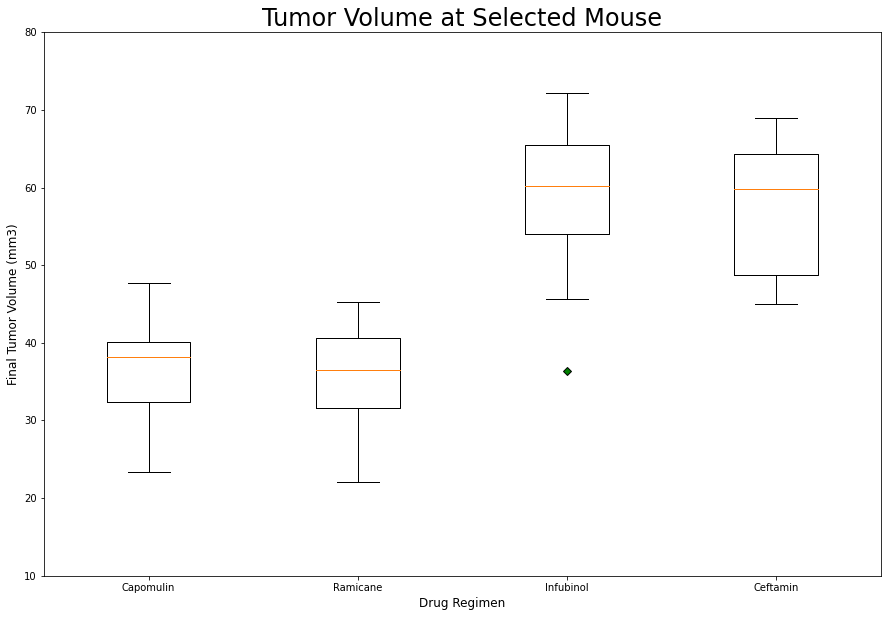

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse', fontsize=24)
ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)
ax1.set_xlabel('Drug Regimen', fontsize=12)
ax1.boxplot(box_data, flierprops=green_diamond, labels=drug, widths=0.4, vert=True)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

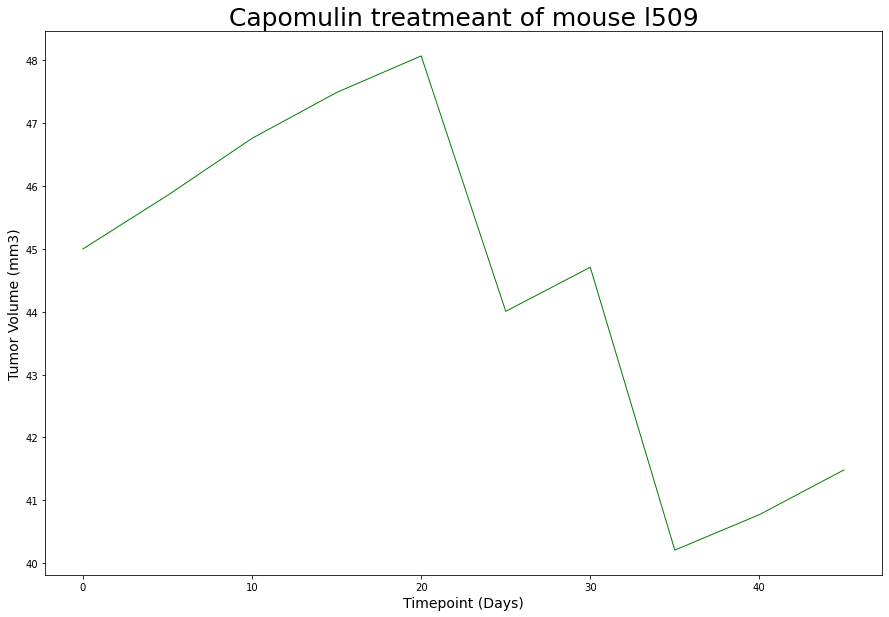

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]

x_axis = line_df["Timepoint"]
tumor_vol = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse l509', fontsize=25)
plt.plot(x_axis, tumor_vol, linewidth=1, color="g")
plt.xlabel('Timepoint (Days)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)

plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capomulin_vol = capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_capomulin_vol['Weight (g)'], avg_capomulin_vol['Tumor Volume (mm3)'], s=175, color="b")
plt.title('Mouse Weight Versus Average Tumor Volume', fontsize=25)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Averag Tumor Volume (mm3)', fontsize=14)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
